# 1. Explore the dataset


In [ ]:
file_path = '../data/raw/vietnam_housing_dataset.csv'
house_data = pd.read_csv(file_path)
house_data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


First, I reviewed the general information of the dataset, including how many values it contains, the number of columns and rows, which values are missing, and whether the attributes are numerical or categorical.

In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


Overall, the dataset contains a relatively large number of samples; however, it also has a high amount of missing data. Some attributes, such as "Balcony direction," have up to 82% missing values.

Based on the initial data inspection, I decided not to use three variables: “House direction” and “Balcony direction,” as they each have more than 50% missing data, making it very difficult to process reliable information from them.

In [50]:
house_data.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,18665.000000,16932.000000,26626.000000,25067.000000,23155.000000,30229.000000
mean,68.498741,5.361692,7.853800,3.410426,3.511030,3.346837,5.872078
std,48.069835,4.346174,7.451313,1.328897,1.309116,1.400181,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,4.000000,2.000000,3.000000,2.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,10.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


In [4]:
house_data['Legal status'].value_counts()

Legal status
Have certificate    24774
Sale contract         949
Name: count, dtype: int64

In [3]:
missing_counts = house_data.isnull().sum()
print(missing_counts)



Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64


In [7]:
missing_percentage = 100 * house_data.isnull().sum() / len(house_data)
print(missing_percentage)

Address               0.000000
Area                  0.000000
Frontage             38.254656
Access Road          43.987562
House direction      70.260346
Balcony direction    82.645804
Floors               11.919018
Bedrooms             17.076317
Bathrooms            23.401370
Legal status         14.906216
Furniture state      46.706805
Price                 0.000000
dtype: float64



# 2. EDA

Next, to identify the relationships between variables, I used a correlation matrix.

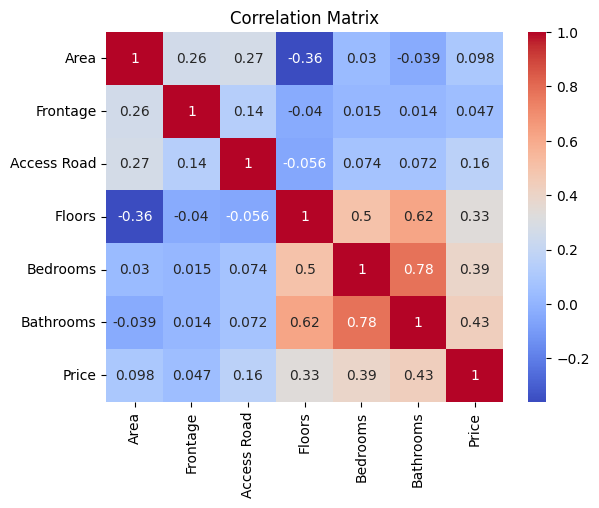

In [4]:
corr = house_data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("correlation.png")
plt.show()

We can see that, when compared to the target variable “Price,” all other variables, to varying degrees, show a positive correlation—meaning they tend to increase as house price increases. However, one surprising observation is that the correlation between area and house price is quite low, even though, in theory, larger houses should be more expensive.

Next, I used histograms to examine the distribution of the variables


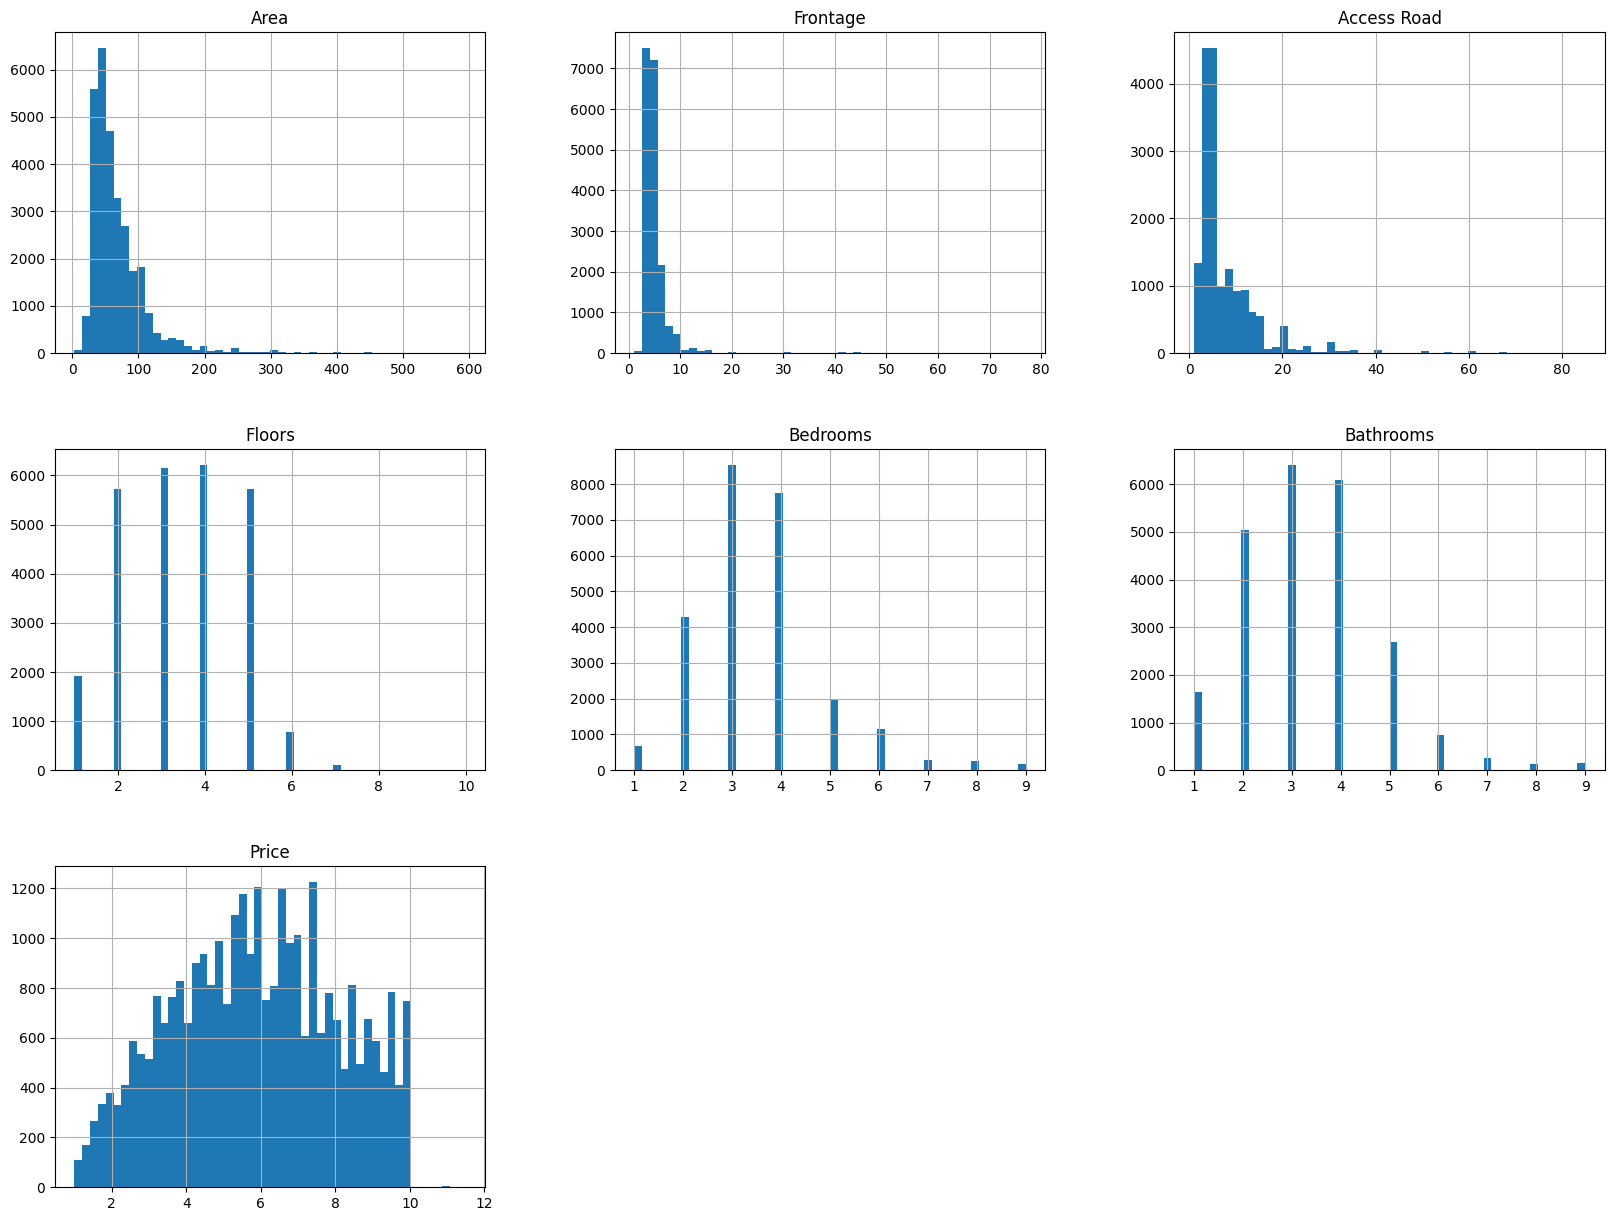

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
house_data.hist(bins=50, figsize=(20,15))
plt.savefig("histogram.png")
plt.show()

I noticed that most of the variables are right-skewed, with the most skewed ones being “Area,” “Frontage,” and “Access Road.” I plan to apply square or logarithmic transformations to these variables to make them easier to work with.

The distribution of the target variable, “Price,” is fairly close to a normal distribution, so I will leave it as is without applying any additional transformation.










To visualize the distribution of the values and check for the presence of outliers, I used boxplots.

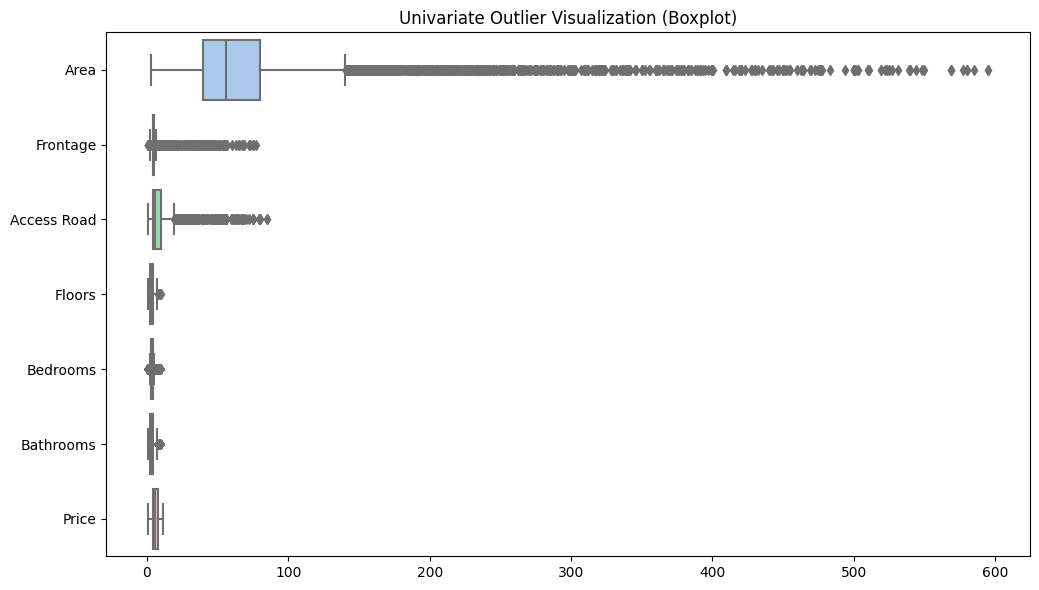

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numerical columns
numeric_cols = house_data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
plt.figure(figsize=(len(numeric_cols)*1.5, 6))
sns.boxplot(data=house_data[numeric_cols], orient='h', palette="pastel")
plt.title("Univariate Outlier Visualization (Boxplot)")
plt.tight_layout()
plt.savefig('boxplot2.png')
plt.show()


As predicted from the histograms, the three variables “Area,” “Frontage,” and “Access Road” contain many outliers, heavily skewed to the right. This reflects the real-world situation quite well, but it makes it difficult for the model to learn the data accurately. To bring these values into a narrower range, I decided to apply a logarithmic transformation to all three of them.

# 3. Data Validation


In [ ]:
%pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 7.9 MB/s eta 0:00:00


To ensure the dataset I’m working with is valid for further analysis, I defined a “schema” for the input data.

In [10]:
import pandera.pandas as pa
from pandera.pandas import Column, DataFrameSchema, Check
from pandera.errors import SchemaError, SchemaErrors

schema = pa.DataFrameSchema({
    "Address": Column(str),
    "Area": Column(float, Check.greater_than(0)),
    "Frontage": Column(float, Check.greater_than_or_equal_to(0), nullable=True),
    "Access Road": Column(float, Check.greater_than_or_equal_to(0), nullable=True),
    "House direction": Column(str, nullable=True),
    "Balcony direction": Column(str, nullable=True),
    "Floors": Column(float, Check.greater_than_or_equal_to(0), nullable=True),
    "Bedrooms": Column(float, Check.greater_than_or_equal_to(0), nullable=True),
    "Bathrooms": Column(float, Check.greater_than_or_equal_to(0), nullable=True),
    "Legal status": Column(str, nullable=True),
    "Furniture state": Column(str, nullable=True),
    "Price": Column(float, Check.greater_than(0)),
})

In [11]:
try:
    validated_df = schema.validate(house_data)
    print("dữ liệu vượt qua kiểm định")
except SchemaError as e:
    print(f"dữ liệu không hợp lệ\nChi tiết lỗi {e}")




    

dữ liệu vượt qua kiểm định


After running the schema to validate the data, I confirmed that the dataset is fully valid and ready for further analysis and model training.